<a href="https://colab.research.google.com/github/Jayakrishna2005/CSA4705deeplearning/blob/main/experiment_16_20_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

experiment 16


In [3]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")


data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


base_model = MLPClassifier(max_iter=1000, random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_test)

print("✅ Base Model Performance (Before Tuning)\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_base)*100, 2), "%\n")


param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01]
}


grid_search = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000, random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


print("✅ Best Parameters Found:")
print(grid_search.best_params_, "\n")

best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

print("✅ Tuned Model Performance (After Tuning)\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred_tuned)*100, 2), "%\n")
print("Classification Report:\n", classification_report(y_test, y_pred_tuned))


✅ Base Model Performance (Before Tuning)

Accuracy: 100.0 %

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best Parameters Found:
{'activation': 'tanh', 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'sgd'} 

✅ Tuned Model Performance (After Tuning)

Accuracy: 100.0 %

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



experiment 17


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - accuracy: 0.5335 - loss: 0.6881 - val_accuracy: 0.6380 - val_loss: 0.6346
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 92ms/step - accuracy: 0.6636 - loss: 0.6119 - val_accuracy: 0.7020 - val_loss: 0.5644
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 94ms/step - accuracy: 0.7180 - loss: 0.5492 - val_accuracy: 0.7160 - val_loss: 0.5294
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 15s 95ms/step - accuracy: 0.7409 - loss: 0.5168 - val_accuracy: 0.7425 - val_loss: 0.5129
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.7706 - loss: 0.4837 - val_accuracy: 0.7400 - val_loss: 0.5224

✅ Test Accuracy: 74.00%


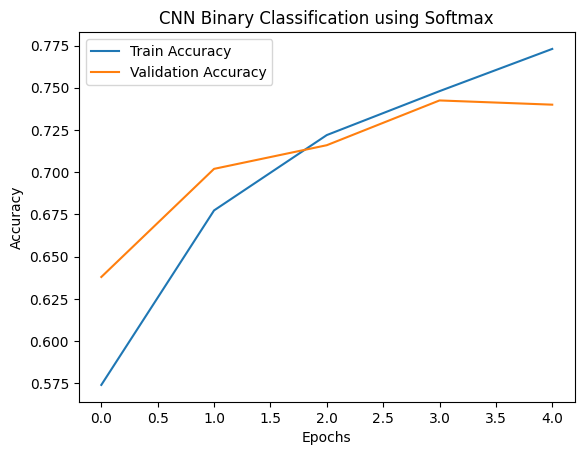

In [4]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

train_filter = np.where((y_train == 3) | (y_train == 5))[0]
test_filter = np.where((y_test == 3) | (y_test == 5))[0]

x_train, y_train = x_train[train_filter], y_train[train_filter]
x_test, y_test = x_test[test_filter], y_test[test_filter]

x_train, x_test = x_train / 255.0, x_test / 255.0

y_train = np.where(y_train == 3, 0, 1)
y_test = np.where(y_test == 3, 0, 1)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc * 100:.2f}%")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Binary Classification using Softmax')
plt.legend()
plt.show()


experiment 18


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

🔹 Training with: Batch=32, Optimizer=adam, Activation=relu, LR=0.001
Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 42ms/step - accuracy: 0.9528 - loss: 0.1165 - val_accuracy: 0.9901 - val_loss: 0.0300
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9914 - loss: 0.0267 - val_accuracy: 0.9926 - val_loss: 0.0234
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9953 - loss: 0.0150 - val_accuracy: 0.9916 - val_loss: 0.0232
✅ Test Accuracy: 99.16%

🔹 Training with: Batch=64, Optimizer=sgd, Activation=tanh, LR=0.01
Epoch 1/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 55s 58ms/step - accuracy: 0.8067 - loss: 0.4385 - val_accuracy: 0.8868 - val_loss: 0.2773
Epoch 2/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.8917 - loss: 0.2661 - val_accuracy: 0.9273 - val_loss: 0.1962
Epoch 3/3
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9282 - loss: 0.1884 - val_accuracy: 0.9537 - val_loss: 0.1331
✅ Test 

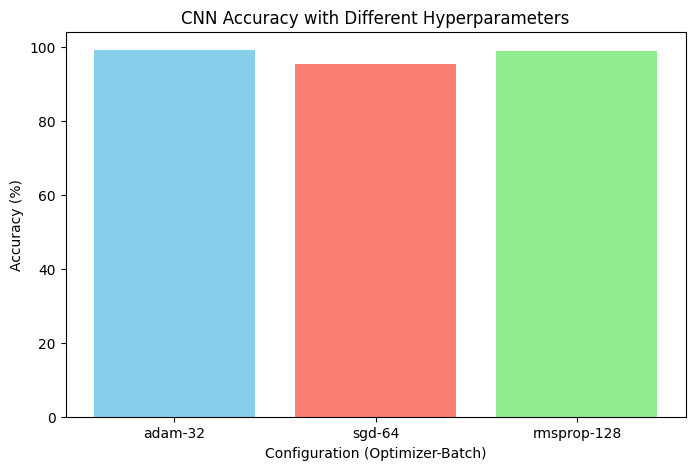

In [5]:

import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


y_train = np.where(y_train % 2 == 0, 0, 1)
y_test = np.where(y_test % 2 == 0, 0, 1)


x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


def build_cnn(activation='relu', learning_rate=0.001, optimizer='adam'):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation=activation, input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation=activation),
        layers.Flatten(),
        layers.Dense(64, activation=activation),
        layers.Dense(1, activation='sigmoid')
    ])


    if optimizer == 'adam':
        opt = optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = optimizers.SGD(learning_rate=learning_rate)
    else:
        opt = optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

configs = [
    {'batch_size': 32, 'optimizer': 'adam', 'activation': 'relu', 'lr': 0.001},
    {'batch_size': 64, 'optimizer': 'sgd',  'activation': 'tanh', 'lr': 0.01},
    {'batch_size': 128, 'optimizer': 'rmsprop', 'activation': 'relu', 'lr': 0.0005},
]

results = []

for cfg in configs:
    print(f"\n🔹 Training with: Batch={cfg['batch_size']}, Optimizer={cfg['optimizer']}, "
          f"Activation={cfg['activation']}, LR={cfg['lr']}")

    model = build_cnn(cfg['activation'], cfg['lr'], cfg['optimizer'])
    history = model.fit(
        x_train, y_train,
        epochs=3, batch_size=cfg['batch_size'],
        validation_data=(x_test, y_test),
        verbose=1
    )

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results.append((cfg['batch_size'], cfg['optimizer'], cfg['activation'], cfg['lr'], test_acc))
    print(f"✅ Test Accuracy: {test_acc*100:.2f}%")

print("\n📊 Final Accuracy Comparison:\n")
for r in results:
    print(f"Batch={r[0]:<5} | Optimizer={r[1]:<8} | Activation={r[2]:<6} | LR={r[3]:<6} | Accuracy={r[4]*100:.2f}%")

labels = [f"{r[1]}-{r[0]}" for r in results]
acc_values = [r[4]*100 for r in results]

plt.figure(figsize=(8,5))
plt.bar(labels, acc_values, color=['skyblue','salmon','lightgreen'])
plt.title('CNN Accuracy with Different Hyperparameters')
plt.xlabel('Configuration (Optimizer-Batch)')
plt.ylabel('Accuracy (%)')
plt.show()


experiment 19


✅ Data Shapes: (250, 64, 64, 1) (250, 64, 64, 1)


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 64, 64, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 64, 64,    │        160 │ input_layer_4[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_9[0][0]    │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 32, 32,    │          0 │ conv2d_10[0][0]   │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_11 (Conv2D)  │ (None, 32, 32,    │      4,640 │ max_pooling2d_5[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_11[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 16, 16,    │          0 │ conv2d_12[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_13 (Conv2D)  │ (None, 16, 16,    │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_14 (Conv2D)  │ (None, 16, 16,    │     36,928 │ conv2d_13[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 32, 32,    │          0 │ conv2d_14[0][0]   │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 96)               │            │ conv2d_12[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 32, 32,    │     27,680 │ concatenate[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 32, 32,    │      9,248 │ conv2d_15[0][0]   │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 64, 64,    │          0 │ conv2d_16[0][0]   │
│ (UpSampling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64, 64,    │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 48)               │            │ conv2d_10[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 64, 64,    │      6,928 │ concatenate_1[0]… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_18 (Conv2D)  │ (None, 64, 64,    │      2,320 │ conv2d_17[0][0] 

 Total params: 117,985 (460.88 KB)

 Trainable params: 117,985 (460.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 522ms/step - accuracy: 0.9351 - loss: 0.4891 - val_accuracy: 0.9957 - val_loss: 0.0153
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 546ms/step - accuracy: 0.9946 - loss: 0.0178 - val_accuracy: 0.9983 - val_loss: 0.0069
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 589ms/step - accuracy: 0.9978 - loss: 0.0069 - val_accuracy: 0.9984 - val_loss: 0.0046
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 501ms/step - accuracy: 0.9986 - loss: 0.0045 - val_accuracy: 0.9985 - val_loss: 0.0033
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 537ms/step - accuracy: 0.9988 - loss: 0.0031 - val_accuracy: 0.9989 - val_loss: 0.0025
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 555ms/step - accuracy: 0.9989 - loss: 0.0026 - val_accuracy: 0.9990 - val_loss: 0.0020
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 469ms/step - accuracy: 0.9991 - loss: 0.0020 - val_accuracy: 0.9993 - val_loss: 0.0016
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 495ms/step - accuracy: 0.9992 - loss: 0.0020 - val_accuracy: 

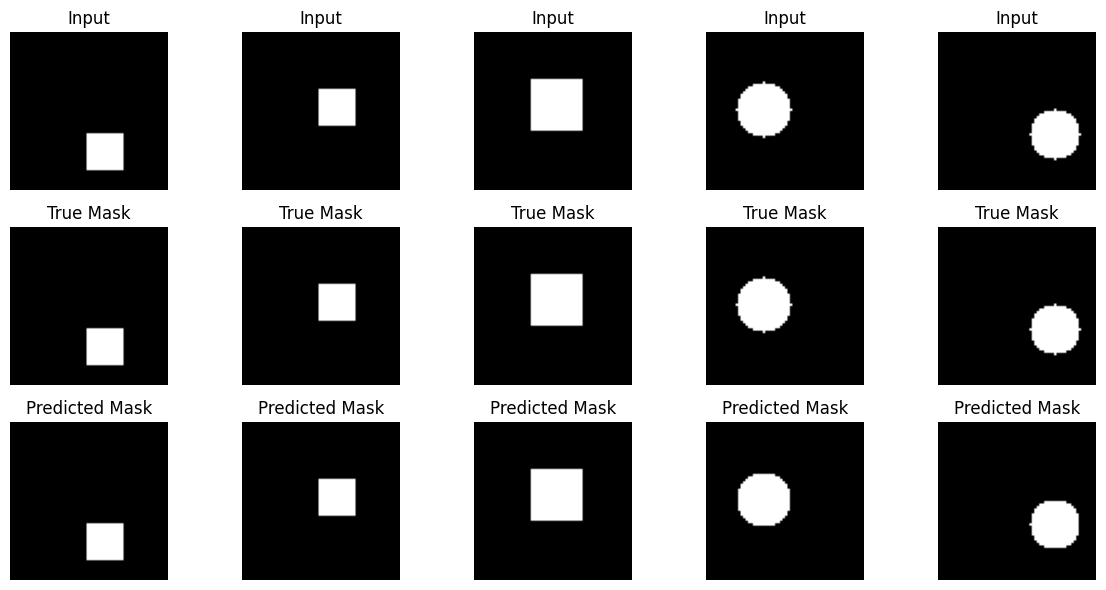

In [6]:
# 🧠 U-Net CNN for Image Segmentation (Python + TensorFlow)
# Author: Seminar Demonstration Example
# Dataset: Synthetic shapes (for quick and clear demo)

# Step 1: Import required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Step 2: Generate simple synthetic dataset (binary segmentation)
def create_dataset(num_samples=200, img_size=64):
    X = np.zeros((num_samples, img_size, img_size, 1), dtype=np.float32)
    Y = np.zeros((num_samples, img_size, img_size, 1), dtype=np.float32)

    for i in range(num_samples):
        shape = np.random.choice(['circle', 'square'])
        x_center, y_center = np.random.randint(15, 49, 2)
        radius = np.random.randint(8, 12)

        y, x = np.ogrid[:img_size, :img_size]
        if shape == 'circle':
            mask = (x - x_center)**2 + (y - y_center)**2 <= radius**2
        else:
            mask = (abs(x - x_center) < radius) & (abs(y - y_center) < radius)

        X[i, mask] = 1.0  # white shape
        Y[i, mask] = 1.0  # segmentation mask

    return X, Y

# Create dataset
X, Y = create_dataset(300, 64)
X_train, Y_train = X[:250], Y[:250]
X_test, Y_test = X[250:], Y[250:]

print("✅ Data Shapes:", X_train.shape, Y_train.shape)

# Step 3: Define U-Net model
def unet_model(input_size=(64, 64, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2,2))(c1)

    c2 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2,2))(c2)

    # Bottleneck
    c3 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(64, (3,3), activation='relu', padding='same')(c3)

    # Decoder
    u1 = layers.UpSampling2D((2,2))(c3)
    u1 = layers.concatenate([u1, c2])
    c4 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(u1)
    c4 = layers.Conv2D(32, (3,3), activation='relu', padding='same')(c4)

    u2 = layers.UpSampling2D((2,2))(c4)
    u2 = layers.concatenate([u2, c1])
    c5 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(u2)
    c5 = layers.Conv2D(16, (3,3), activation='relu', padding='same')(c5)

    outputs = layers.Conv2D(1, (1,1), activation='sigmoid')(c5)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# Step 4: Compile model
model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Step 5: Train model
history = model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_data=(X_test, Y_test), verbose=1)

# Step 6: Evaluate model
loss, acc = model.evaluate(X_test, Y_test)
print(f"\n✅ Test Accuracy: {acc*100:.2f}%")

# Step 7: Visualize predictions
preds = model.predict(X_test[:5])

plt.figure(figsize=(12,6))
for i in range(5):
    plt.subplot(3,5,i+1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Input")
    plt.axis('off')

    plt.subplot(3,5,i+6)
    plt.imshow(Y_test[i].squeeze(), cmap='gray')
    plt.title("True Mask")
    plt.axis('off')

    plt.subplot(3,5,i+11)
    plt.imshow(preds[i].squeeze() > 0.5, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')

plt.tight_layout()
plt.show()


experiment 20

In [7]:


import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


x_train_flat = x_train.reshape(len(x_train), -1)
x_test_flat = x_test.reshape(len(x_test), -1)

x_train_seq = x_train.reshape(-1, 28, 28)
x_test_seq = x_test.reshape(-1, 28, 28)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("\n🔹 Training Restricted Boltzmann Machine...")
rbm = BernoulliRBM(n_components=256, learning_rate=0.01, batch_size=64, n_iter=5, random_state=42)
rbm.fit(x_train_flat)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(rbm.transform(x_train_flat), y_train)
y_pred_rbm = log_reg.predict(rbm.transform(x_test_flat))

acc_rbm = accuracy_score(y_test, y_pred_rbm)
print(f"✅ RBM Test Accuracy: {acc_rbm * 100:.2f}%")


print("\n🔹 Training Simple RNN...")
rnn_model = models.Sequential([
    layers.SimpleRNN(64, activation='tanh', input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])
rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
rnn_model.fit(x_train_seq, y_train_cat, epochs=3, batch_size=128, validation_split=0.1, verbose=1)

rnn_acc = rnn_model.evaluate(x_test_seq, y_test_cat, verbose=0)[1]
print(f"✅ RNN Test Accuracy: {rnn_acc * 100:.2f}%")

print("\n🔹 Training LSTM Model...")
lstm_model = models.Sequential([
    layers.LSTM(64, activation='tanh', input_shape=(28, 28)),
    layers.Dense(10, activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(x_train_seq, y_train_cat, epochs=3, batch_size=128, validation_split=0.1, verbose=1)

lstm_acc = lstm_model.evaluate(x_test_seq, y_test_cat, verbose=0)[1]
print(f"✅ LSTM Test Accuracy: {lstm_acc * 100:.2f}%")

print("\n📊 Model Performance Summary:")
print(f"Boltzmann Machine (RBM): {acc_rbm * 100:.2f}%")
print(f"Simple RNN: {rnn_acc * 100:.2f}%")
print(f"LSTM: {lstm_acc * 100:.2f}%")



🔹 Training Restricted Boltzmann Machine...
✅ RBM Test Accuracy: 95.98%

🔹 Training Simple RNN...
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.6105 - loss: 1.1849 - val_accuracy: 0.8732 - val_loss: 0.4090
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.8803 - loss: 0.3957 - val_accuracy: 0.9337 - val_loss: 0.2376
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9145 - loss: 0.2913 - val_accuracy: 0.9410 - val_loss: 0.1972
✅ RNN Test Accuracy: 93.16%

🔹 Training LSTM Model...
Epoch 1/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.5722 - loss: 1.2611 - val_accuracy: 0.9300 - val_loss: 0.2408
Epoch 2/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9254 - loss: 0.2425 - val_accuracy: 0.9577 - val_loss: 0.1445
Epoch 3/3
422/422 ━━━━━━━━━━━━━━━━━━━━ 18s 43ms/step - accuracy: 0.9528 - loss: 0.1606 - val_accuracy: 0.9612 - val_loss: 0.1290
✅ LSTM Test Accuracy: 95.58%

📊 Model Performance Summary:
Boltzmann Machine